# First step was to set up dbt and virtualenv with python

# I set everything up in VS Code and installed the dbt Power User extention
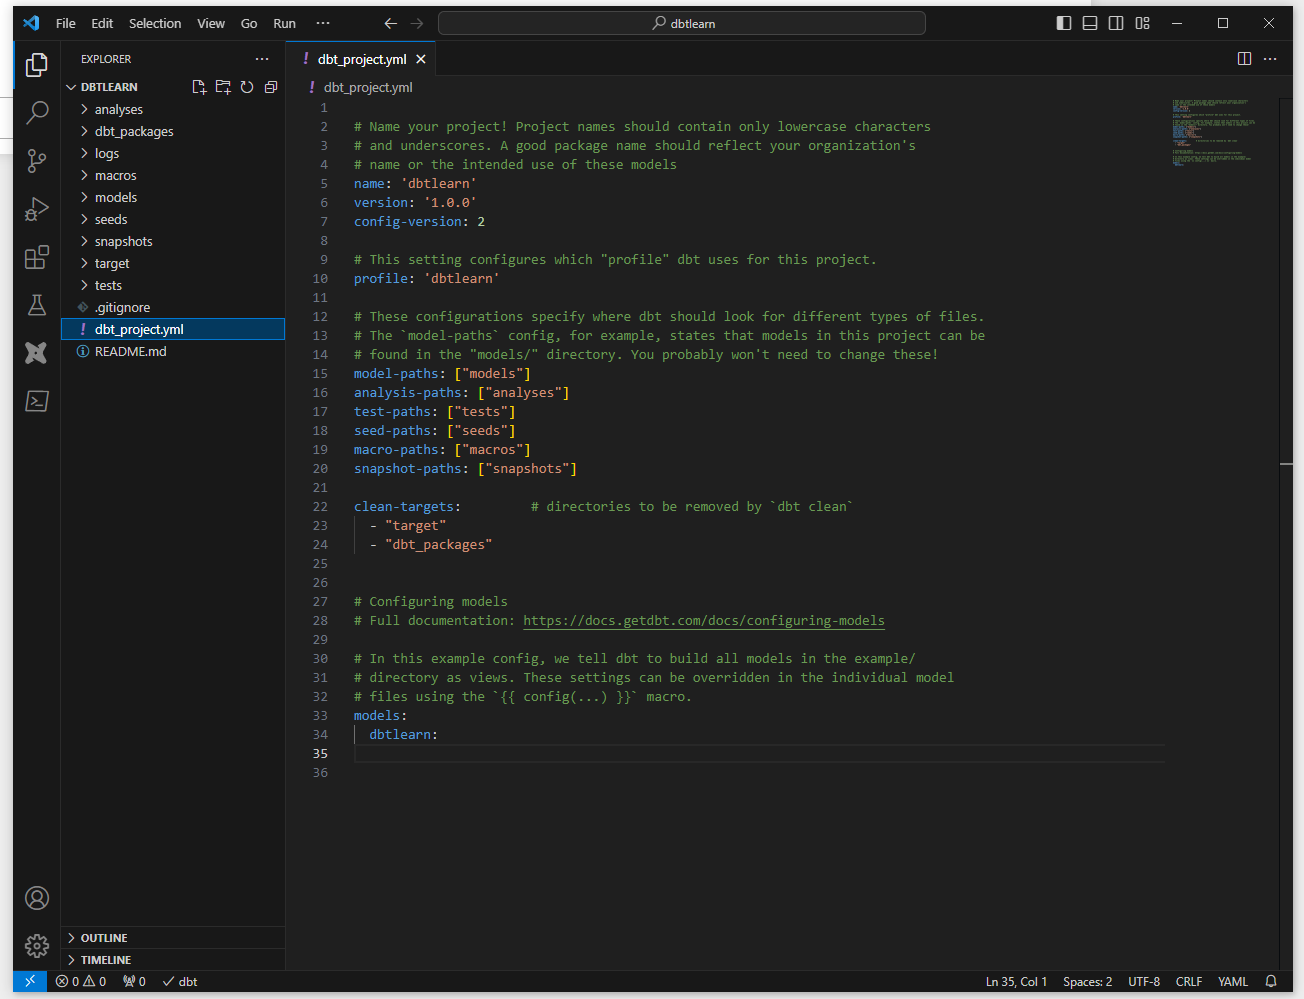

# From there I created the tables in Snowflake and populated them from s3
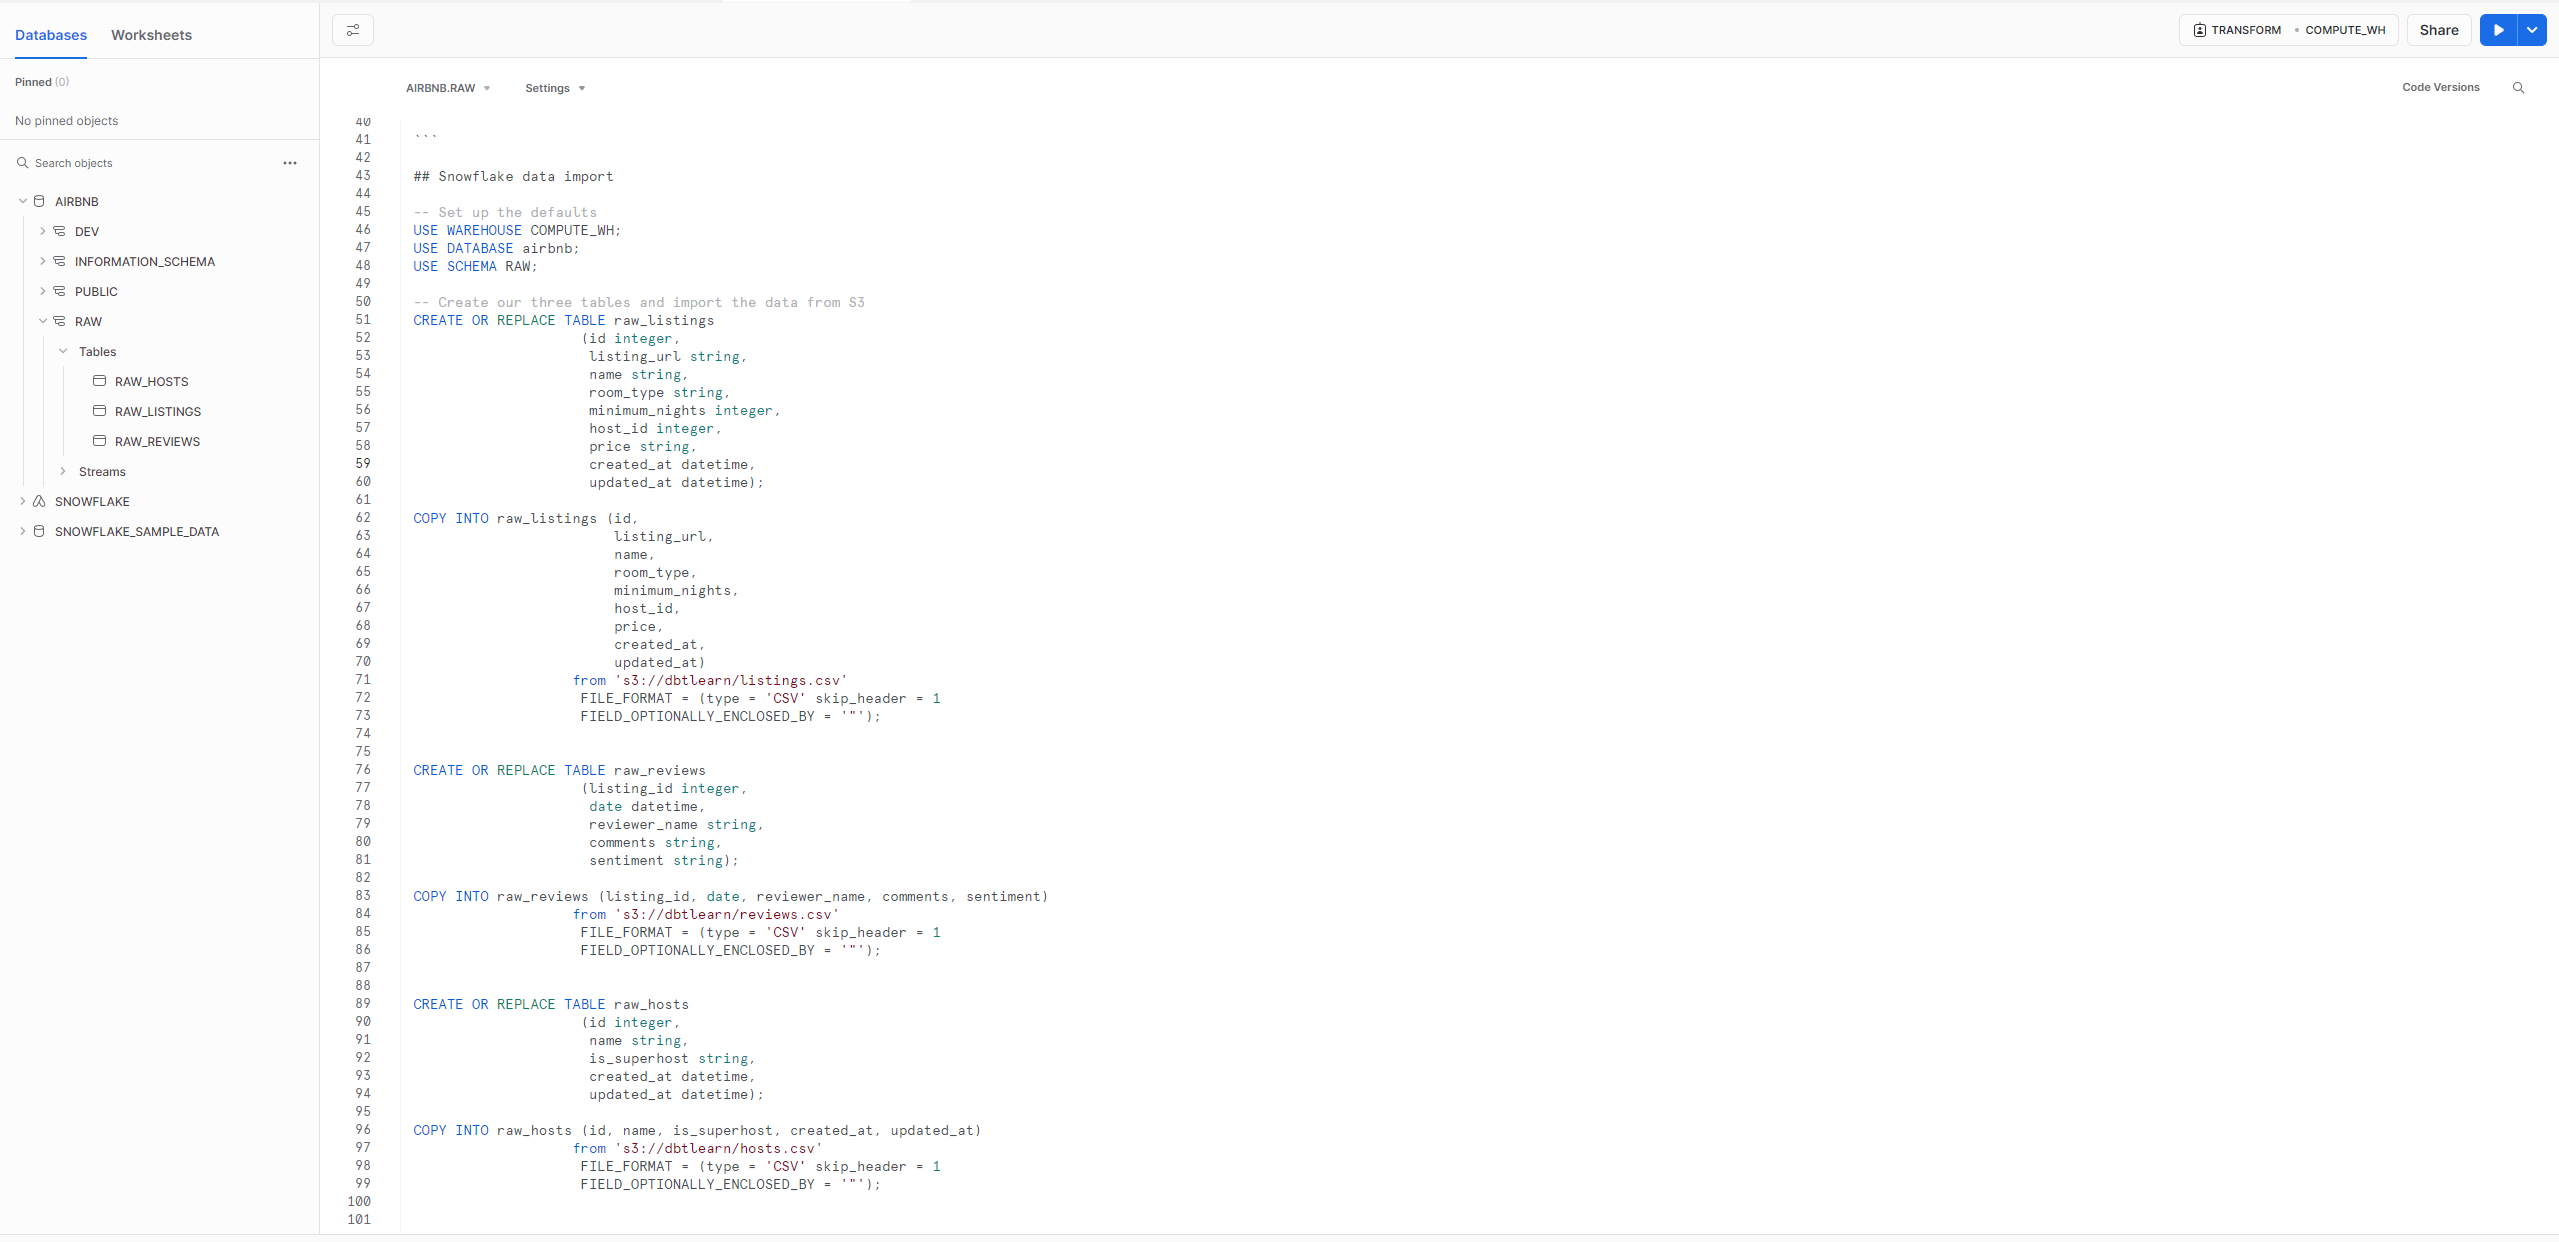

In [ ]:
-- Create our three tables and import the data from S3
CREATE OR REPLACE TABLE raw_listings
                    (id integer,
                     listing_url string,
                     name string,
                     room_type string,
                     minimum_nights integer,
                     host_id integer,
                     price string,
                     created_at datetime,
                     updated_at datetime);
                    
COPY INTO raw_listings (id,
                        listing_url,
                        name,
                        room_type,
                        minimum_nights,
                        host_id,
                        price,
                        created_at,
                        updated_at)
                   from 's3://dbtlearn/listings.csv'
                    FILE_FORMAT = (type = 'CSV' skip_header = 1
                    FIELD_OPTIONALLY_ENCLOSED_BY = '"');
                    

CREATE OR REPLACE TABLE raw_reviews
                    (listing_id integer,
                     date datetime,
                     reviewer_name string,
                     comments string,
                     sentiment string);
                    
COPY INTO raw_reviews (listing_id, date, reviewer_name, comments, sentiment)
                   from 's3://dbtlearn/reviews.csv'
                    FILE_FORMAT = (type = 'CSV' skip_header = 1
                    FIELD_OPTIONALLY_ENCLOSED_BY = '"');
                    

CREATE OR REPLACE TABLE raw_hosts
                    (id integer,
                     name string,
                     is_superhost string,
                     created_at datetime,
                     updated_at datetime);
                    
COPY INTO raw_hosts (id, name, is_superhost, created_at, updated_at)
                   from 's3://dbtlearn/hosts.csv'
                    FILE_FORMAT = (type = 'CSV' skip_header = 1
                    FIELD_OPTIONALLY_ENCLOSED_BY = '"');



# I then modeled these out in Snowflake as CTEs, created a src folder in VS Code -> dbt, a src model for each and finally deployed them in Snowflake

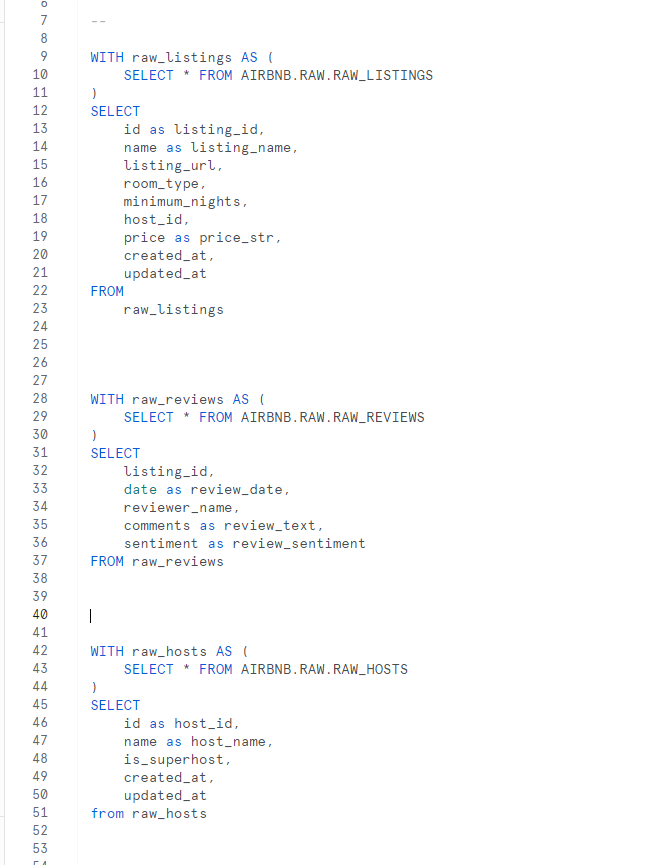

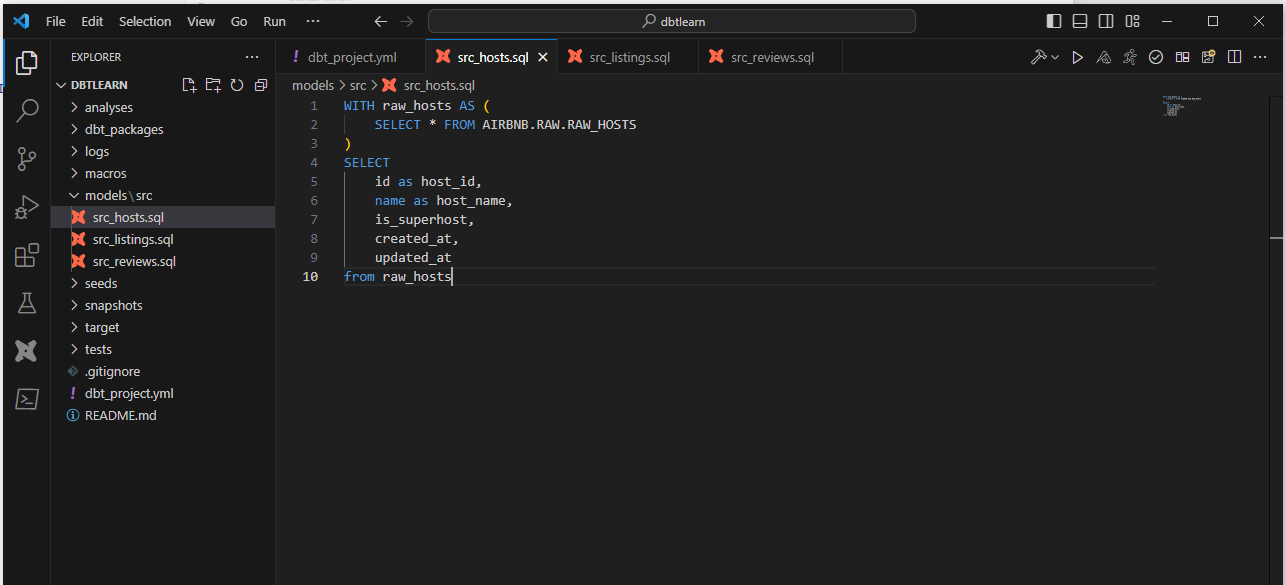

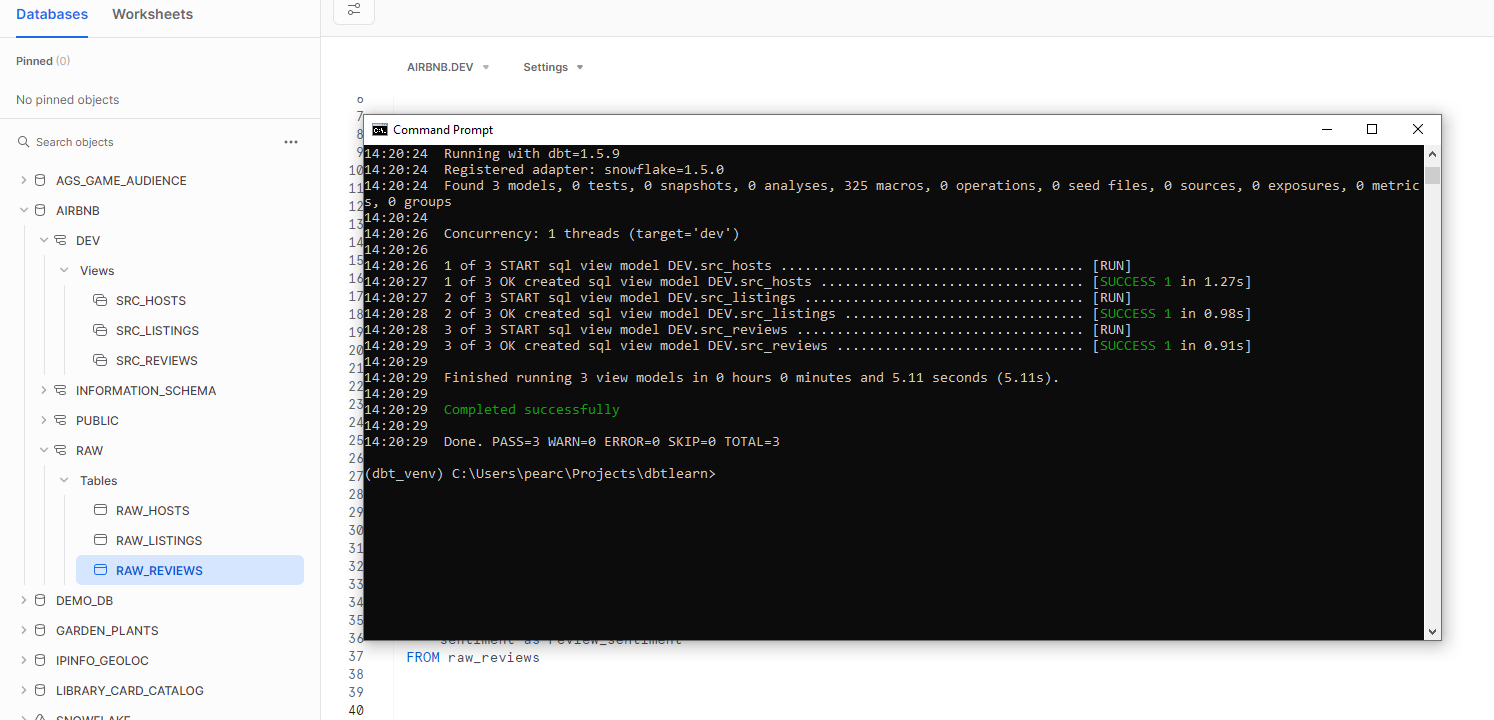

# I then created cleaned dim and fct tables, and updated the materialization for each directory and deployed to Snowflake. 

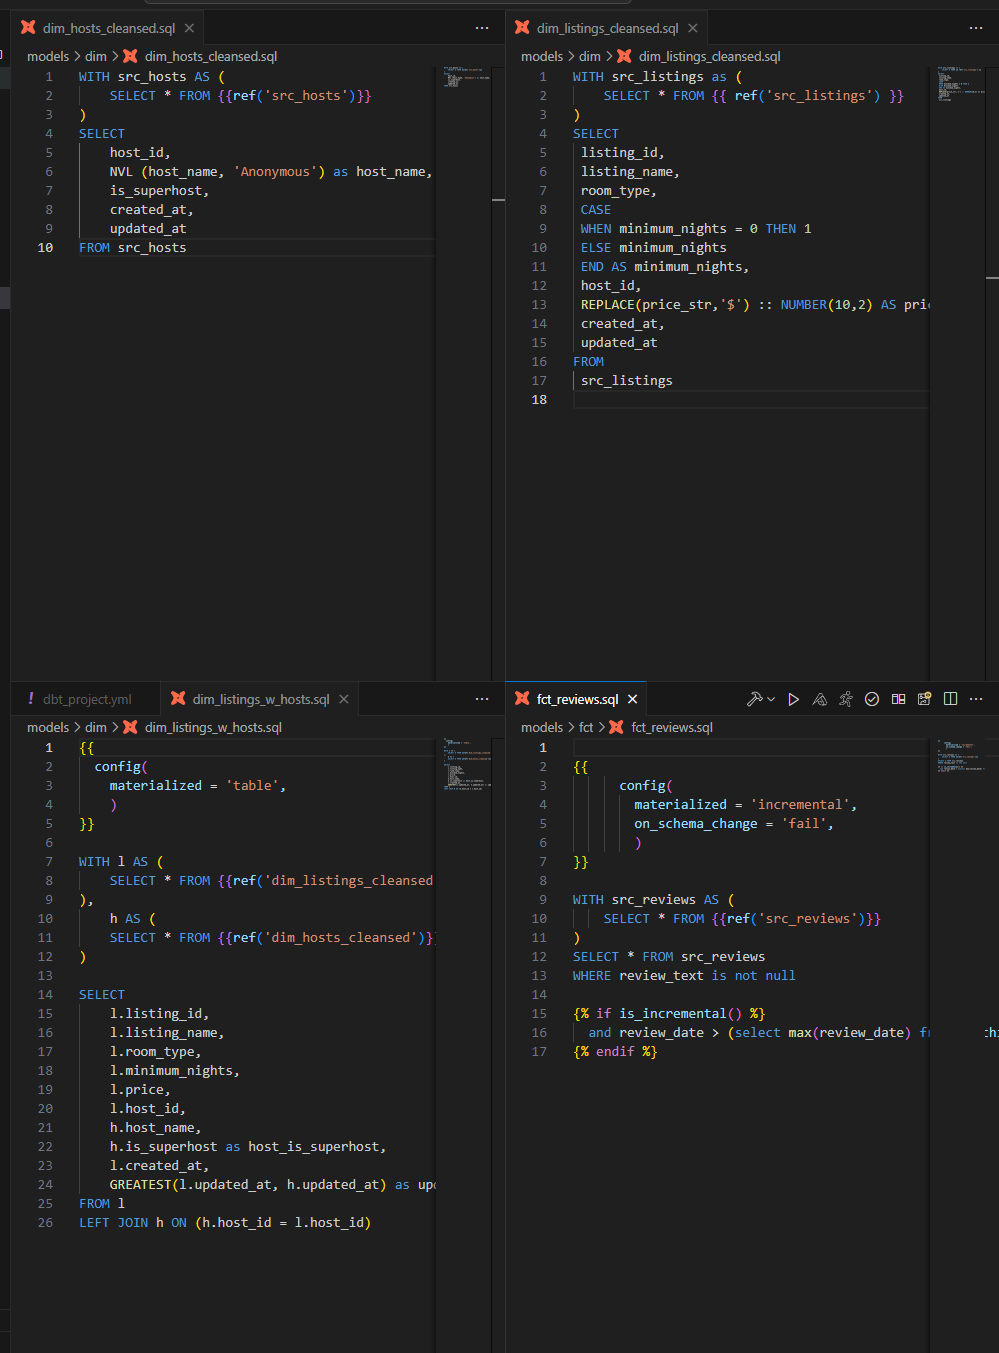
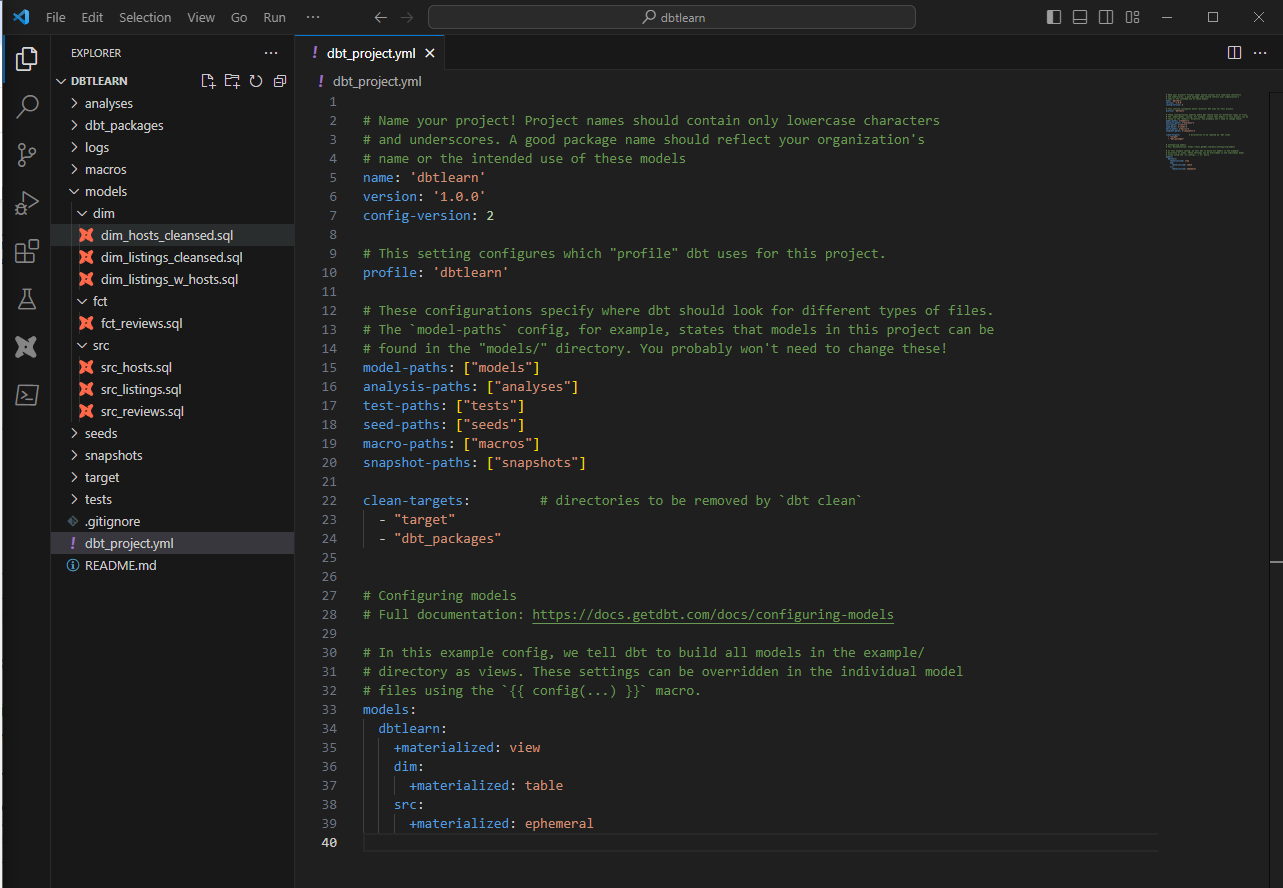
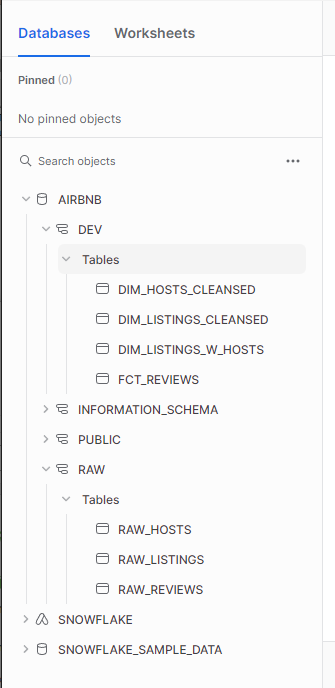